
This is a digital architecture based on the paper "A 95.6-TOPS/W Deep Learning Inference
Accelerator With Per-Vector Scaled 4-bit Quantization in 5 nm" created by Simon Opsahl, 
Christina Crow, and Carlos Villa. 

Some of the important variables for scc_proj_2025:

- *TECHNOLOGY*: 5nm nm
- *SUPPORTED_INPUT_BITS*: 8 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 16 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 8 bit(s)
- *GLOBAL_CYCLE_SECONDS*: 1.1e-09 clock period

Components are defined the following places:
- workspace/models/arch/1_macro/scc_proj_2025/example_components/components.csv
- workspace/models/arch/1_macro/scc_proj_2025/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!



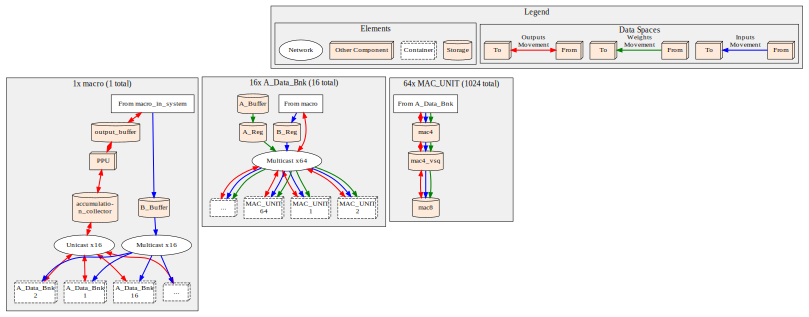

In [9]:
from _tests import scripts
from scripts.notebook_utils import *
import helper_functions



display_markdown(
    f"""
This is a digital architecture based on the paper "A 95.6-TOPS/W Deep Learning Inference
Accelerator With Per-Vector Scaled 4-bit Quantization in 5 nm" created by Simon Opsahl, 
Christina Crow, and Carlos Villa. 

{get_important_variables_markdown('scc_proj_2025')}

Components are defined the following places:
- workspace/models/arch/1_macro/scc_proj_2025/example_components/components.csv
- workspace/models/arch/1_macro/scc_proj_2025/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!

"""
)
display_diagram(get_diagram("scc_proj_2025", ignore=DIAGRAM_DEFAULT_IGNORE))

In [4]:
int4_res= run_test("scc_proj_2025", "test_sparsemm_energy_breakdown", sparsity = 0.7, bitwidth = 4)
# result = run_test("scc_proj_2025", "test_mm_energy_breakdown")
int4_energies = int4_res.per_component_energy

print(int4_energies)



   ### Matrix Multiply Energy Breakdown 

   This test evaluates the energy breakdown for a matrix multiply workload
   where both input matrix A and weight matrix B are drawn from a Gaussian
   distribution with inputted sparsity.
   
   Possible Parameters for future:
       bitwdith (int) (optional): size of input bits, if you're using INT4/INT4-VSQ or INT8
       sparsity (float) (optional): decimal sparsity amount, 0.5 == 50% sparsity
       std (float) (optional): standard deviationi for Gaussian distribution
   

{'mac4': 4.8653926399999997e-08, 'A_Reg': 7.61266176e-09, 'A_Buffer': 8.7031808e-09, 'B_Buffer': 1.054867456e-08, 'accumulation_collector': 1.44703488e-08, 'PPU': 6.10271232e-11, 'output_buffer': 3.79584512e-11, 'main_memory': 2.097152e-06}


In [8]:
# Determine energy of int8 datapath
int8_res = run_test("scc_proj_2025", "test_idle_energy_breakdown", sparsity = 0.7, bitwidth = 8)

int8_energies = int8_res.per_component_energy
print(int8_energies)



   ### Matrix Multiply Energy Breakdown 

   This test evaluates the energy breakdown for a matrix multiply workload
   where both input matrix A and weight matrix B are drawn from a Gaussian
   distribution with inputted sparsity.
   
   Possible Parameters for future:
       bitwdith (int) (optional): size of input bits, if you're using INT4/INT4-VSQ or INT8
       sparsity (float) (optional): decimal sparsity amount, 0.5 == 50% sparsity
       std (float) (optional): standard deviationi for Gaussian distribution
   

{'mac8': 5.70425344e-08, 'A_Reg': 7.61266176e-09, 'A_Buffer': 8.71366656e-09, 'B_Buffer': 1.05906176e-08, 'accumulation_collector': 1.44703488e-08, 'PPU': 6.144655359999999e-11, 'output_buffer': 7.31906048e-11, 'main_memory': 1.048576e-06}


In [10]:
# Determine energies using int4vsq datapath
int4vsq_res = run_test("scc_proj_2025", "test_sparsemm_energy_breakdown", sparsity = 0.7, bitwidth = 4)
int4vsq_energies = int4vsq_res.per_component_energy
print(int4vsq_energies)


   ### Matrix Multiply Energy Breakdown 

   This test evaluates the energy breakdown for a matrix multiply workload
   where both input matrix A and weight matrix B are drawn from a Gaussian
   distribution with inputted sparsity.
   
   Possible Parameters for future:
       bitwdith (int) (optional): size of input bits, if you're using INT4/INT4-VSQ or INT8
       sparsity (float) (optional): decimal sparsity amount, 0.5 == 50% sparsity
       std (float) (optional): standard deviationi for Gaussian distribution
   

{'mac4_vsq': 3.48127232e-08, 'A_Reg': 7.61266176e-09, 'A_Buffer': 8.7031808e-09, 'B_Buffer': 1.054867456e-08, 'accumulation_collector': 1.44703488e-08, 'PPU': 6.10271232e-11, 'output_buffer': 3.79584512e-11, 'main_memory': 2.097152e-06}


In [14]:
# Normalize energies
normalization_component = "mac4"

norm_factor = int4_energies[normalization_component]
norm_factor2 = norm_factor*0.5 # also normalized for computes per/cycle


def normalize_dicts(energies,norm_factor):
    norm_dict = {}
    other = 0
    for comp,energy in energies.items():
        if comp in ["mac4", "mac4_vsq" , "mac8"]:
            norm_dict["Datapath"] = energy/norm_factor
        elif comp in ["A_Buffer", "B_Buffer", "accumulation_collector"]:
            norm_dict[comp] = energy/norm_factor
        elif comp != "main_memory":
            other+=energy
    norm_dict["other"] = other/norm_factor

    return norm_dict
int8_norm = normalize_dicts(int8_energies, norm_factor2)
int4_norm = normalize_dicts(int4_energies, norm_factor)
int4vsq_norm = normalize_dicts(int4vsq_energies,norm_factor)

print(helper_functions.generate_pd_table([int8_norm,int4_norm,int4vsq_norm], ["INT8","INT4","INT4-VSQ",]))

          Datapath  A_Buffer  B_Buffer  accumulation_collector     other
INT8      2.344828  0.358190  0.435345                0.594828  0.318466
INT4      1.000000  0.178879  0.216810                0.297414  0.158500
INT4-VSQ  0.715517  0.178879  0.216810                0.297414  0.158500


In [1]:
# Make graphs
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_energy')*1e15 for r in result},
    ylabel="Energy (fJ/MAC)",
    title=f"Energy Breakdown per Compute",
    ax=axs[0]
)
bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_area')*1e12 for r in result},
    ylabel="Area (um^2)",
    title=f"Area Breakdown per Compute",
    ax=axs[1]
)



NameError: name 'plt' is not defined

In [ ]:
# !tl mapper /home/workspace/scripts/../outputs/267.140641013174272/parsed-processed-input.yaml 
print(helper_functions.generate_histograms(4,2,.49))